In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [38]:
n_pts = 500
X, Y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise=0.1, factor=0.2)

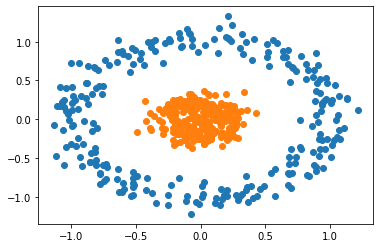

In [39]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [40]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [41]:
h = model.fit(x=X, y=Y, verbose=0, batch_size = 20, epochs = 100, shuffle = 'true')

Text(0.5, 1.0, 'accuracy')

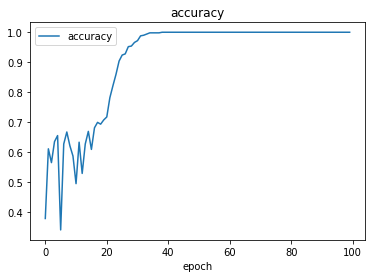

In [42]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

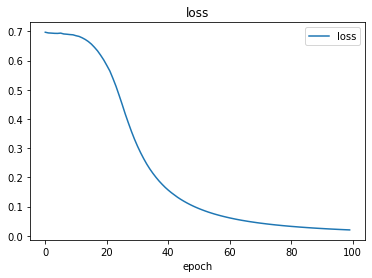

In [43]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [44]:
def plot_decision_boundary(X, Y, model):
  x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0] + 0.25))
  y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1] + 0.25))
  xx, yy = np.meshgrid(x_span, y_span)
  xx_ , yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred_func = model.predict(grid)
  z= pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

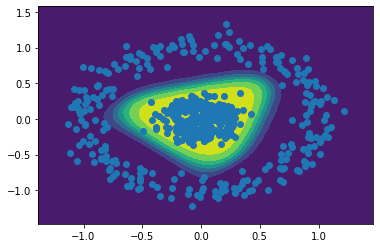

In [45]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is:  [[0.05233744]]


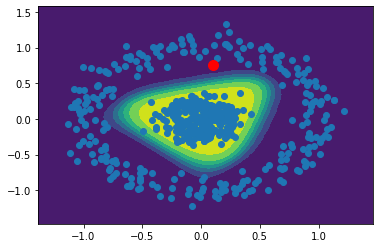

In [46]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

point_try = np.array([[0.1, 0.75]])
prediction_try = model.predict(point_try)
plt.plot([0.1], [0.75], marker='o', markersize= 10, color='red' )
print("Prediction is: ", prediction_try)